# Calculate and plot depth trends

This functionality calculates the depth trends for selected well logs, using a linear trend by default, and writes the result back to the *project_table.xlsx* file in the *Regressions* sheet.

Make sure that you have covered *introduction to blixt_rp.ipynb* before starting here.

Import the necessary python scripts

In [2]:
import os
import sys

working_dir = 'C:\\Users\\marten\\PycharmProjects\\blixt_rp'
sys.path.append(working_dir)

#the following two lines are only necessary when working with development versions of the code
sys.path.append('C:\\Users\\marten\\PycharmProjects\\blixt_rp')
sys.path.append('C:\\Users\\marten\\PycharmProjects\\blixt_utils')

import blixt_utils.io.io as uio
import blixt_rp.plotting.plot_logs as rpp
import blixt_utils.utils as bu

Open the existing project

In [3]:
import MyProject as mp
wp, wells, templates, wis = mp.init(working_dir, new=False)

To successfully write the depth trends back in the project table *project_table.xlsx* it needs to be closed. So please make sure that it is not open.

A correct calculation of the depth trends depends on that we have True Vertical Depth (TVD) logs for all wells. The *init()* script above reads the well deviation files and adds the TVD.

Then define which well logs, any cut offs, and working intervals to calculate the depth trends for.

In [3]:
log_table = {'P velocity': 'vp_dry', 'S velocity': 'vs_dry', 'Density': 'rho_dry', 'Porosity': 'phie', 'Volume': 'vcl'}
cutoffs_sands = {'Volume': ['<', 0.5], 'Porosity': ['>', 0.1]}
cutoffs_shales = {'Volume': ['>', 0.5], 'Porosity': ['<', 0.1]}

Create lists of above, which we later will iterate over

In [4]:
log_tables = [log_table, log_table, log_table]
wi_names = ['Sand C', 'Sand H', 'Shale C']
cutoffs = [cutoffs_sands, cutoffs_sands, cutoffs_shales]
suffixes = ['sand_c', 'sand_h', 'shale_c']

To few data points in vp_dry, in well WELL_B, after masking
To few data points in vp_dry, in well WELL_C, after masking
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1330e+08                                    2.11e+08    
       1              2         6.5366e+05      1.13e+08       1.41e+00       2.40e+03    
       2              3         6.5365e+05      1.08e+01       2.83e+00       3.81e+00    
       3              4         6.5363e+05      2.15e+01       5.66e+00       3.80e+00    
       4              5         6.5359e+05      4.30e+01       1.13e+01       3.81e+00    
       5              6         6.5350e+05      8.60e+01       2.26e+01       3.80e+00    
       6              7         6.5333e+05      1.72e+02       4.53e+01       3.79e+00    
       7              8         6.5299e+05      3.42e+02       9.05e+01       3.77e+00    
       8              9         6.5231e+05      6.79e+02     

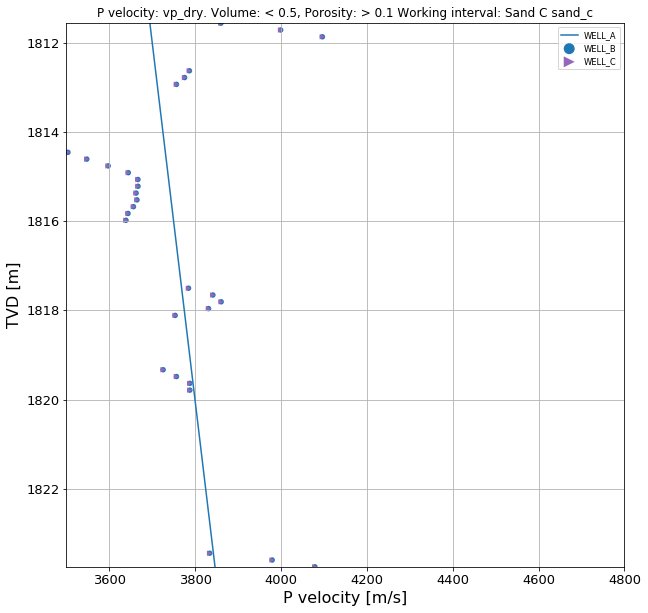

To few data points in vs_dry, in well WELL_B, after masking
To few data points in vs_dry, in well WELL_C, after masking
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.1521e+06                                    3.29e+07    
       1              2         4.1058e+05      2.74e+06       1.41e+00       3.27e+01    
       2              3         4.1057e+05      1.09e+01       2.83e+00       3.84e+00    
       3              4         4.1054e+05      2.17e+01       5.66e+00       3.84e+00    
       4              5         4.1050e+05      4.34e+01       1.13e+01       3.84e+00    
       5              6         4.1041e+05      8.68e+01       2.26e+01       3.83e+00    
       6              7         4.1024e+05      1.73e+02       4.53e+01       3.82e+00    
       7              8         4.0990e+05      3.45e+02       9.05e+01       3.80e+00    
       8              9         4.0921e+05      6.85e+02     

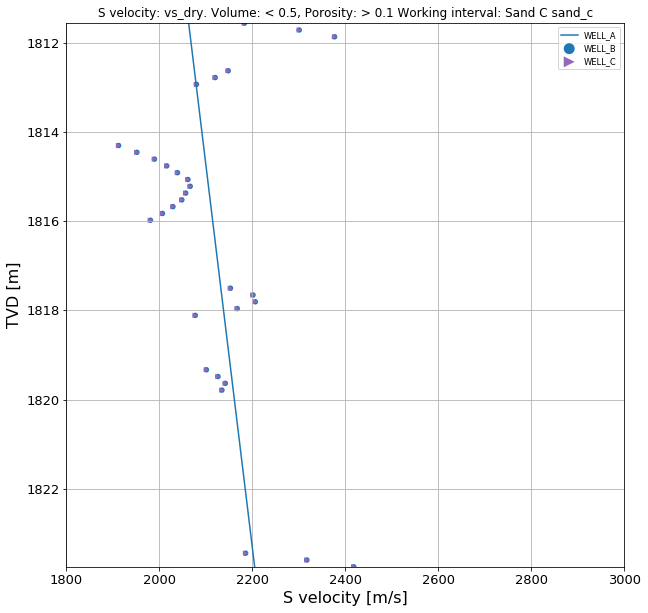

To few data points in rho_dry, in well WELL_B, after masking
To few data points in rho_dry, in well WELL_C, after masking
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.8831e+07                                    1.98e+08    
       1              2         1.1642e+00      9.88e+07       1.41e+00       2.12e+04    
       2              3         2.7148e-02      1.14e+00       2.83e+00       5.27e-04    
       3              4         2.6458e-02      6.89e-04       2.61e+00       9.62e-07    
       4              6         2.6458e-02      0.00e+00       0.00e+00       9.62e-07    
`xtol` termination condition is satisfied.
Function evaluations 6, initial cost 9.8831e+07, final cost 2.6458e-02, first-order optimality 9.62e-07.


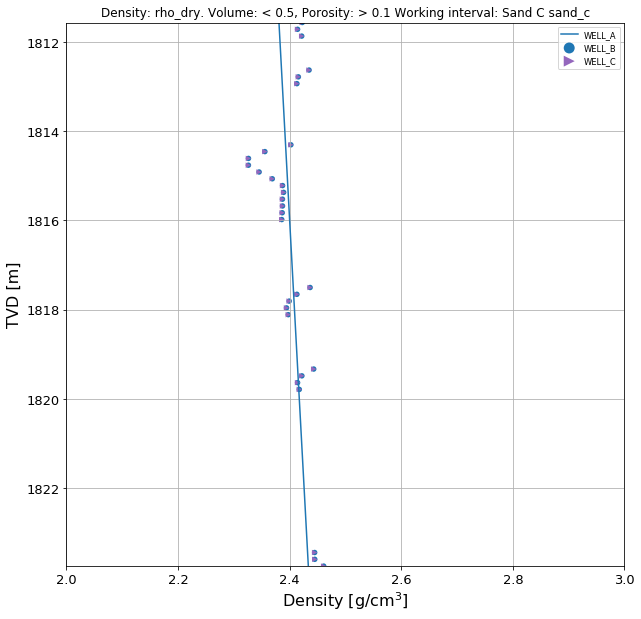

To few data points in phie, in well WELL_B, after masking
To few data points in phie, in well WELL_C, after masking
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.9079e+07                                    1.98e+08    
       1              2         1.6296e-02      9.91e+07       1.41e+00       1.16e+01    
       2              3         1.6250e-02      4.59e-05       6.72e-01       9.75e-09    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 9.9079e+07, final cost 1.6250e-02, first-order optimality 9.75e-09.


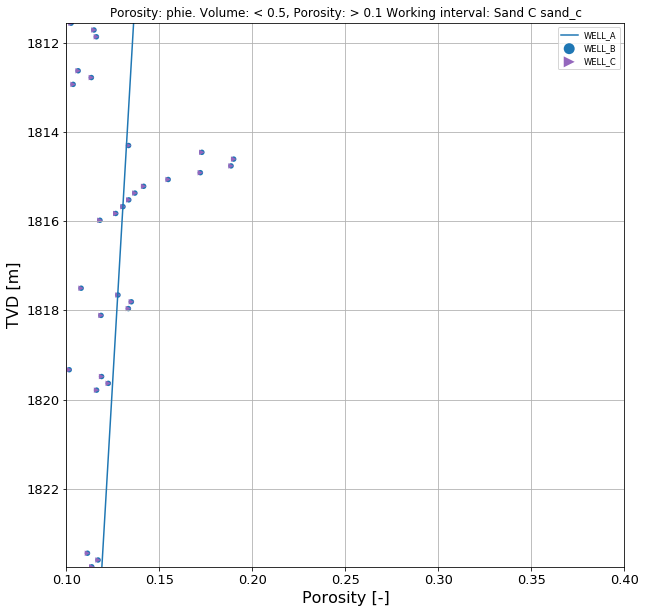

To few data points in vcl, in well WELL_B, after masking
To few data points in vcl, in well WELL_C, after masking
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.9082e+07                                    1.98e+08    
       1              2         1.1852e-01      9.91e+07       1.41e+00       1.00e+03    
       2              3         1.1247e-01      6.05e-03       2.83e+00       9.53e-04    
       3              4         1.1022e-01      2.25e-03       4.73e+00       2.36e-06    
       4              5         1.1022e-01      5.41e-16       5.35e-08       6.16e-08    
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 5, initial cost 9.9082e+07, final cost 1.1022e-01, first-order optimality 6.16e-08.


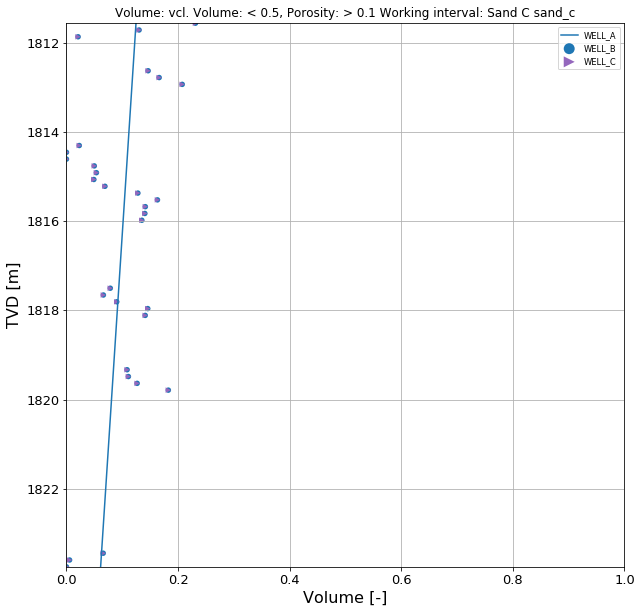

Sand C sand_c
{'vp_dry': array([ 1.24599969e+01, -1.88777087e+04]), 'vs_dry': array([ 1.16518051e+01, -1.90451400e+04]), 'rho_dry': array([ 4.31967802e-03, -5.44451886e+00]), 'phie': array([-1.39951805e-03,  2.67141151e+00]), 'vcl': array([-5.20468276e-03,  9.55324748e+00])}


Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.8687e+09                                    9.45e+09    
       1              2         6.4519e+07      3.80e+09       1.41e+00       1.32e+05    
       2              3         6.4459e+07      6.05e+04       2.83e+00       2.14e+04    
       3              4         6.4338e+07      1.21e+05       5.66e+00       2.13e+04    
       4              5         6.4097e+07      2.41e+05       1.13e+01       2.13e+04    
       5              6         6.3617e+07      4.79e+05     

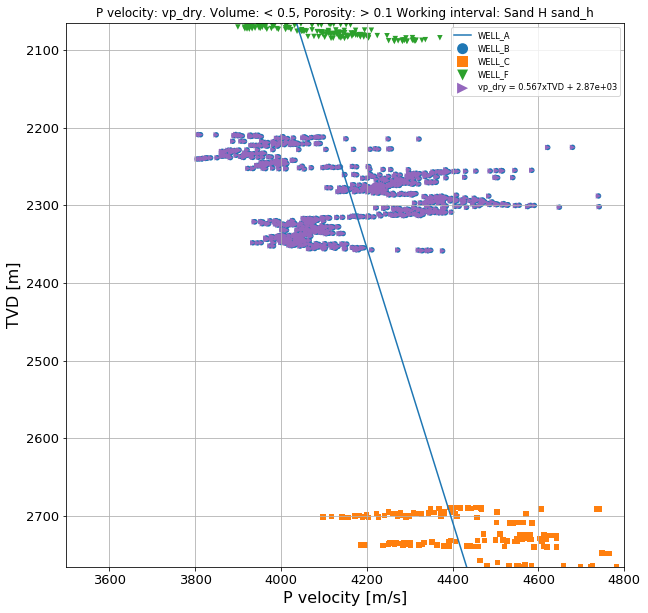

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.7813e+07                                    8.79e+08    
       1              2         3.4857e+07      3.30e+07       1.41e+00       1.11e+04    
       2              3         3.4825e+07      3.14e+04       2.83e+00       1.11e+04    
       3              4         3.4762e+07      6.27e+04       5.66e+00       1.11e+04    
       4              5         3.4638e+07      1.25e+05       1.13e+01       1.10e+04    
       5              6         3.4391e+07      2.47e+05       2.26e+01       1.08e+04    
       6              7         3.3910e+07      4.82e+05       4.53e+01       1.05e+04    
       7              8         3.2992e+07      9.17e+05       9.05e+01       9.79e+03    
       8              9         3.1342e+07      1.65e+06       1.81e+02       8.44e+03    
       9             10         2.8776e+07      2.57e+06       3.62e+02       5.73e+03    

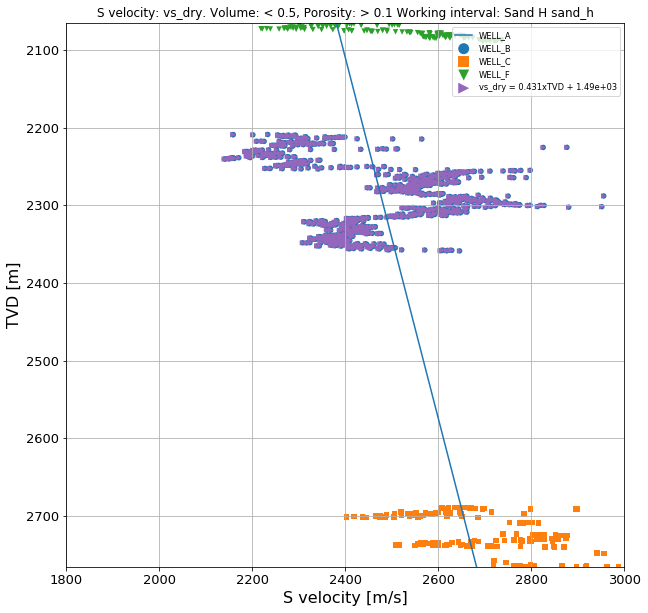

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8615e+09                                    1.17e+10    
       1              2         1.4373e+00      5.86e+09       1.41e+00       4.72e+04    
       2              3         1.1660e+00      2.71e-01       2.17e-01       3.75e-05    
       3              4         1.1660e+00      0.00e+00       0.00e+00       3.75e-05    
`xtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.8615e+09, final cost 1.1660e+00, first-order optimality 3.75e-05.


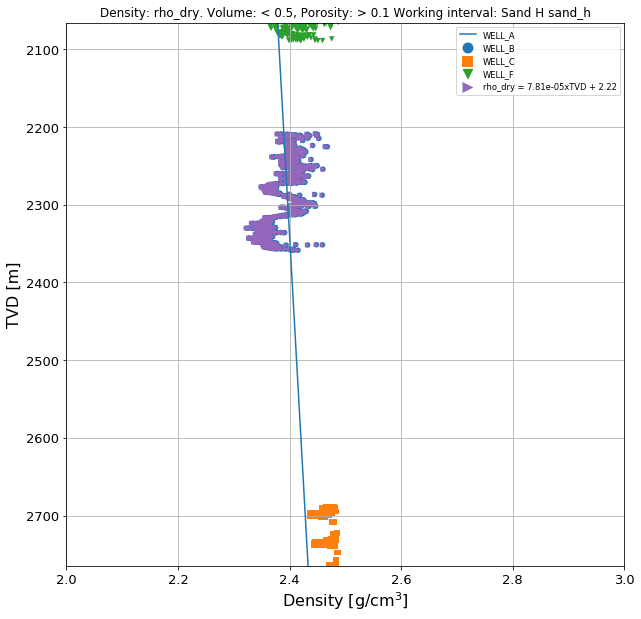

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8729e+09                                    1.17e+10    
       1              2         5.8604e-01      5.87e+09       1.26e+00       4.04e-01    
       2              3         5.8604e-01      1.70e-11       1.64e-06       7.40e-10    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 5.8729e+09, final cost 5.8604e-01, first-order optimality 7.40e-10.


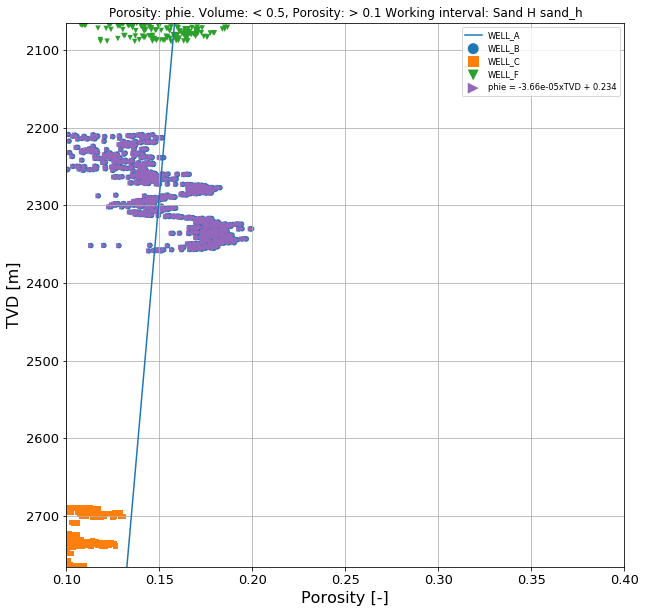

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8735e+09                                    1.17e+10    
       1              2         6.2231e+00      5.87e+09       1.40e+00       4.04e-01    
       2              3         6.2231e+00      1.70e-11       1.64e-06       5.52e-10    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 5.8735e+09, final cost 6.2231e+00, first-order optimality 5.52e-10.


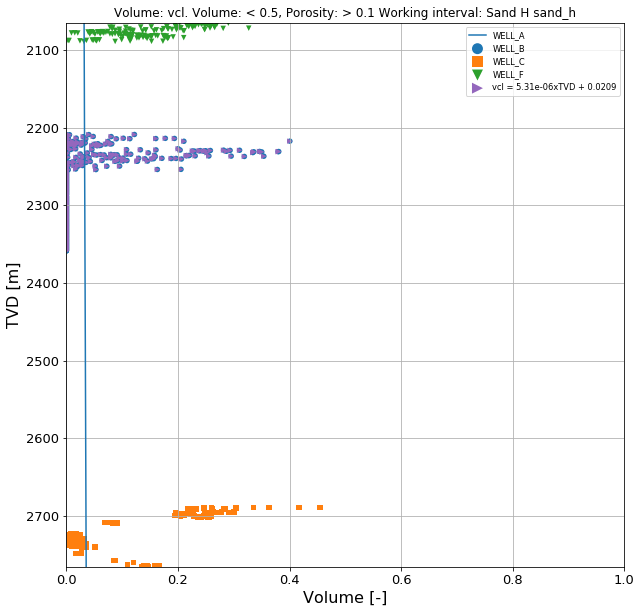

Sand H sand_h
{'vp_dry': array([5.66529022e-01, 2.86609382e+03]), 'vs_dry': array([4.30889327e-01, 1.49076150e+03]), 'rho_dry': array([7.80527175e-05, 2.21745947e+00]), 'phie': array([-3.66138630e-05,  2.33793527e-01]), 'vcl': array([5.31278487e-06, 2.08731150e-02])}


Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5816e+10                                    2.63e+10    
       1              2         7.4751e+08      1.51e+10       1.41e+00       2.83e+06    
       2              3         7.4552e+08      1.99e+06       2.83e+00       7.03e+05    
       3              4         7.4155e+08      3.97e+06       5.66e+00       7.00e+05    
       4              5         7.3366e+08      7.89e+06       1.13e+01       6.94e+05    
       5              6         7.1808e+08      1.56e+07       2.26e+

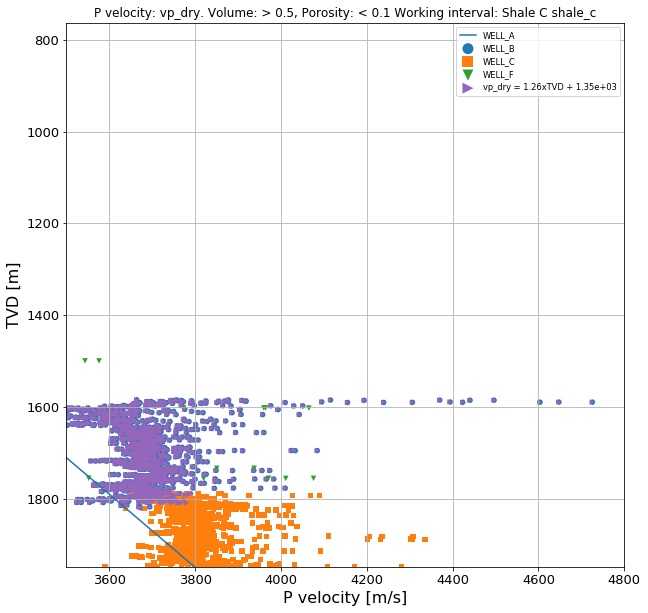

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5866e+08                                    1.96e+09    
       1              2         1.7462e+08      8.40e+07       1.41e+00       7.75e+04    
       2              3         1.7440e+08      2.17e+05       2.83e+00       7.61e+04    
       3              4         1.7398e+08      4.22e+05       5.66e+00       7.31e+04    
       4              5         1.7319e+08      7.94e+05       1.13e+01       6.72e+04    
       5              6         1.7180e+08      1.39e+06       2.26e+01       5.54e+04    
       6              7         1.6983e+08      1.97e+06       4.53e+01       3.18e+04    
       7              8         1.6886e+08      9.66e+05       6.08e+01       2.52e+01    
       8             11         1.6886e+08      0.00e+00       0.00e+00       2.52e+01    
`xtol` termination condition is satisfied.
Function evaluations 11, initial cost 2.5866e+0

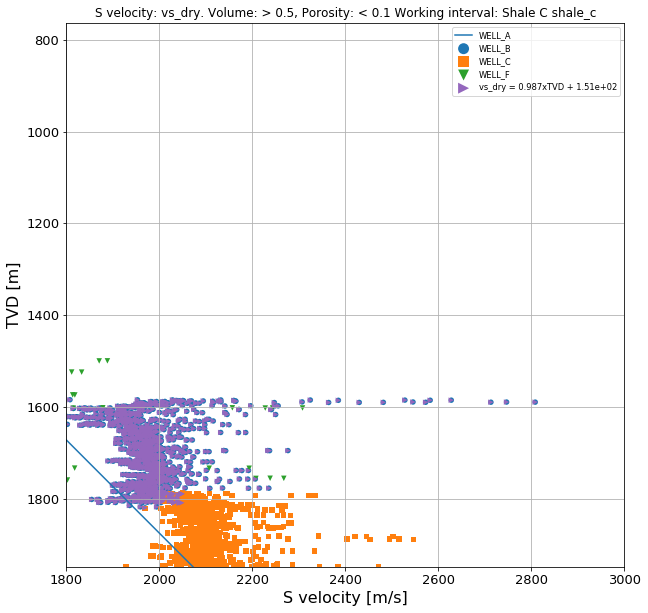

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1433e+10                                    2.29e+10    
       1              2         8.1683e+01      1.14e+10       1.37e+00       8.22e-01    
       2              3         8.1683e+01      1.70e-11       9.35e-08       1.17e-07    
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 1.1433e+10, final cost 8.1683e+01, first-order optimality 1.17e-07.


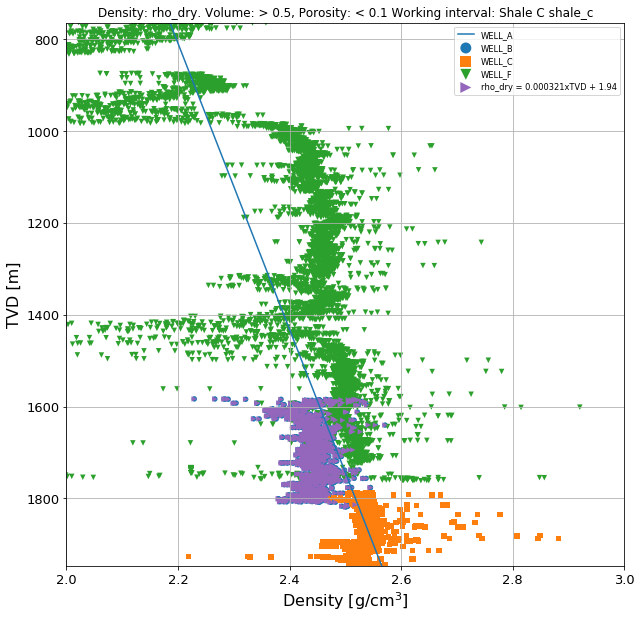

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1470e+10                                    2.29e+10    
       1              2         2.2965e+01      1.15e+10       1.41e+00       1.00e+06    
       2              3         8.3677e-01      2.21e+01       2.01e-02       2.19e-09    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 1.1470e+10, final cost 8.3677e-01, first-order optimality 2.19e-09.


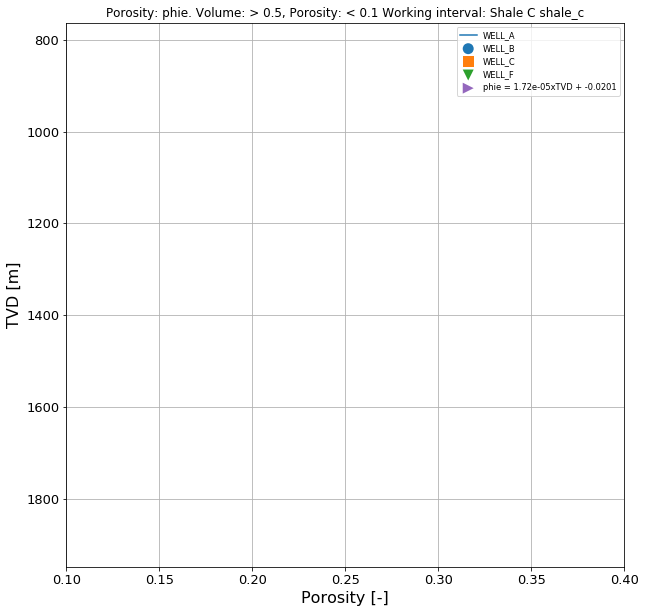

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1455e+10                                    2.29e+10    
       1              2         2.7683e+01      1.15e+10       1.01e+00       9.04e-01    
       2              3         2.7683e+01      2.01e-11       9.32e-08       5.09e-08    
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 1.1455e+10, final cost 2.7683e+01, first-order optimality 5.09e-08.


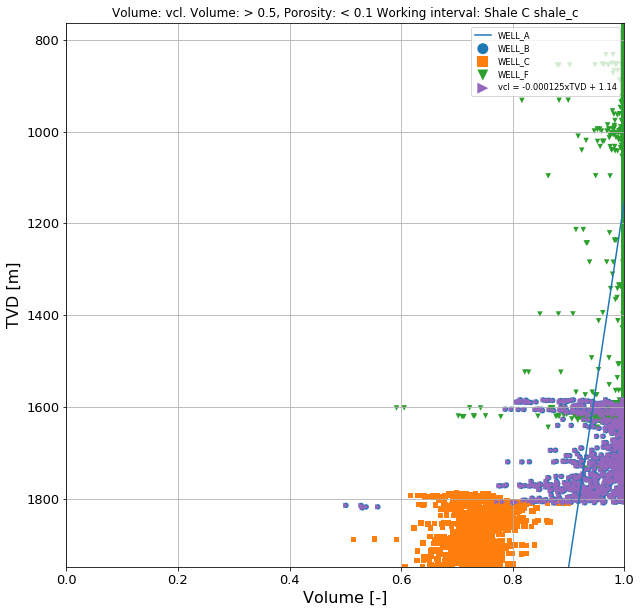

Shale C shale_c
{'vp_dry': array([1.25659218e+00, 1.35171165e+03]), 'vs_dry': array([  0.98676162, 150.93913947]), 'rho_dry': array([3.21130311e-04, 1.94011719e+00]), 'phie': array([ 1.72099747e-05, -2.01468655e-02]), 'vcl': array([-1.25328386e-04,  1.14429856e+00])}


Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet
Opening existing sheet


In [5]:
for i in range(len(log_tables)):
    depth_trends = rpp.plot_depth_trends(wells, log_tables[i], wis, wi_names[i], templates, cutoffs[i], 
                                        suffix=suffixes[i], verbose=True, results_folder=None)
    print(wi_names[i], suffixes[i])
    print(depth_trends)
    print('\n')
    # Write depth trends to project table
    for log_name in depth_trends:
        uio.write_regression(wp.project_table, depth_trends[log_name], log_name, 'All', wi_names[i], 'Linear',
                                     note='Linear depth trend f(z) = A x z + B. z = TVD in m\n {}'.format(
                                         bu.mask_string(cutoffs[i], wi_names[i])))

The resulting depth trends can now be read from the project table, and used where needed.

In *Sand C* we have little data, and the depth trends are not very robust, but we can plot the trends of the acoustic impedance in *Sand H* and *Shale C* to see how they behave

dict_keys(['vp_dry', 'vs_dry', 'rho_dry', 'phie', 'vcl'])


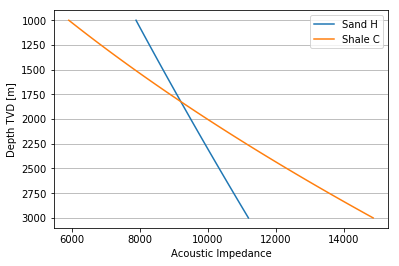

In [10]:
from blixt_utils.misc.curve_fitting import linear_function
import matplotlib.pyplot as plt
import numpy as np

trends = uio.read_regressions(wp.project_table)
print(trends.keys())

my_tvd_range = np.linspace(1000., 3000.)

fig, ax = plt.subplots()
intervals = ['Sand H', 'Shale C']

for i, interval in enumerate(intervals): 
    ax.plot(
        linear_function(my_tvd_range, *trends['vp_dry']['All'][interval]['Linear']['Params']) * 
        linear_function(my_tvd_range, *trends['rho_dry']['All'][interval]['Linear']['Params']),
        my_tvd_range, 
        label=interval
    )
ax.set_ylim(*ax.get_ylim()[::-1])
ax.set_ylabel('Depth TVD [m]')
ax.set_xlabel('Acoustic Impedance')
ax.grid(axis='y')
ax.legend()

Please note that at around 1800m TVD, sands goes from being stiff relative to the shale, to become soft relative to the shale.